In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/creditcard.csv


In [2]:
import matplotlib.pyplot  as plt
import seaborn as sns
import math 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import confusion_matrix

In [3]:
def null_values(df): # function for null  values 
    null_values=pd.DataFrame({  "Null Values":df.isnull().sum() } )
    null_values=null_values.reset_index()
    print(null_values)

In [4]:
df=pd.read_csv("/kaggle/input/fraud-detection/creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
rows=df.shape[0]
cols=df.shape[1]
print(f"rows are {rows} , columns are {cols}" )

rows are 284807 , columns are 31


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
print('Normal Transactions:', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fraud Transaction:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
#dataset is imbalance 

Normal Transactions: 99.83 % of the dataset
Fraud Transaction: 0.17 % of the dataset


In [9]:
df['Time'] = df['Time'].apply(lambda sec: (sec/3600)) # to get hours
df['hour'] = df['Time'] % 24   # to get hours
df['hour'] = df['hour'].apply(lambda x: math.floor(x))
df['day'] = df['Time']/24   # 2 days of data

df['day'] = df['day'].apply(lambda x : 1 if(x==0) else math.ceil(x)) 

In [10]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,day
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,1


In [11]:
null_values(df) 


     index  Null Values
0     Time            0
1       V1            0
2       V2            0
3       V3            0
4       V4            0
5       V5            0
6       V6            0
7       V7            0
8       V8            0
9       V9            0
10     V10            0
11     V11            0
12     V12            0
13     V13            0
14     V14            0
15     V15            0
16     V16            0
17     V17            0
18     V18            0
19     V19            0
20     V20            0
21     V21            0
22     V22            0
23     V23            0
24     V24            0
25     V25            0
26     V26            0
27     V27            0
28     V28            0
29  Amount            0
30   Class            0
31    hour            0
32     day            0


In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,day
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000
mean,26.337183,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727,14.046470,1.491631
std,13.191152,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,5.835854,0.499931
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000,1.000000
25%,15.055972,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,10.000000,1.000000
50%,23.525556,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,15.000000,1.000000
75%,38.700139,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,19.000000,2.000000
max,47.997778,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,23.000000,2.000000


In [13]:
 cate_columns=df.select_dtypes(include=['category','object']) # extract categorical features
 

In [14]:
numeric_columns=df.select_dtypes(include=['int','float']) # extract numeric features
numeric_columns

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,day
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,47.996111,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23,2
284803,47.996389,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23,2
284804,47.996667,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23,2
284805,47.996667,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23,2


In [15]:
ca1 = df['Class'].value_counts() # count 0s  and 1s
print(f"Fraud Transactions are  {ca1[0]}")
print(f"Normal Transactions are  {ca1[1]}")

Fraud Transactions are  284315
Normal Transactions are  492


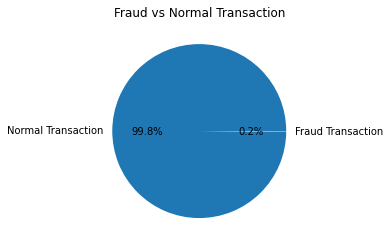

In [16]:
 
ca1 = ca1.set_axis(['Normal Transaction','Fraud Transaction'], axis="index")

ca1.plot(kind = 'pie' ,autopct='%.1f%%')
plt.axis('off') 
plt.title("Fraud vs Normal Transaction")
plt.show()

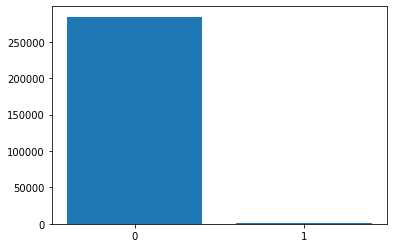

In [17]:
b=[]
for a in df['Class'].value_counts():
    b.append(a)
col=[0,1]
plt.bar(x=col, height=b) 
plt.xticks(ticks=[0,1], label=[])  
plt.show()
 


In [18]:
a=df.groupby("Class")["Amount"].sum()   
 
print(f"Fraud Transactions Amount :  {a[1]} Million")
print(f"Normal Transactions Amount:  {a[0]} Million")

Fraud Transactions Amount :  60127.97 Million
Normal Transactions Amount:  25102462.04 Million


# EDA

##   histogram 

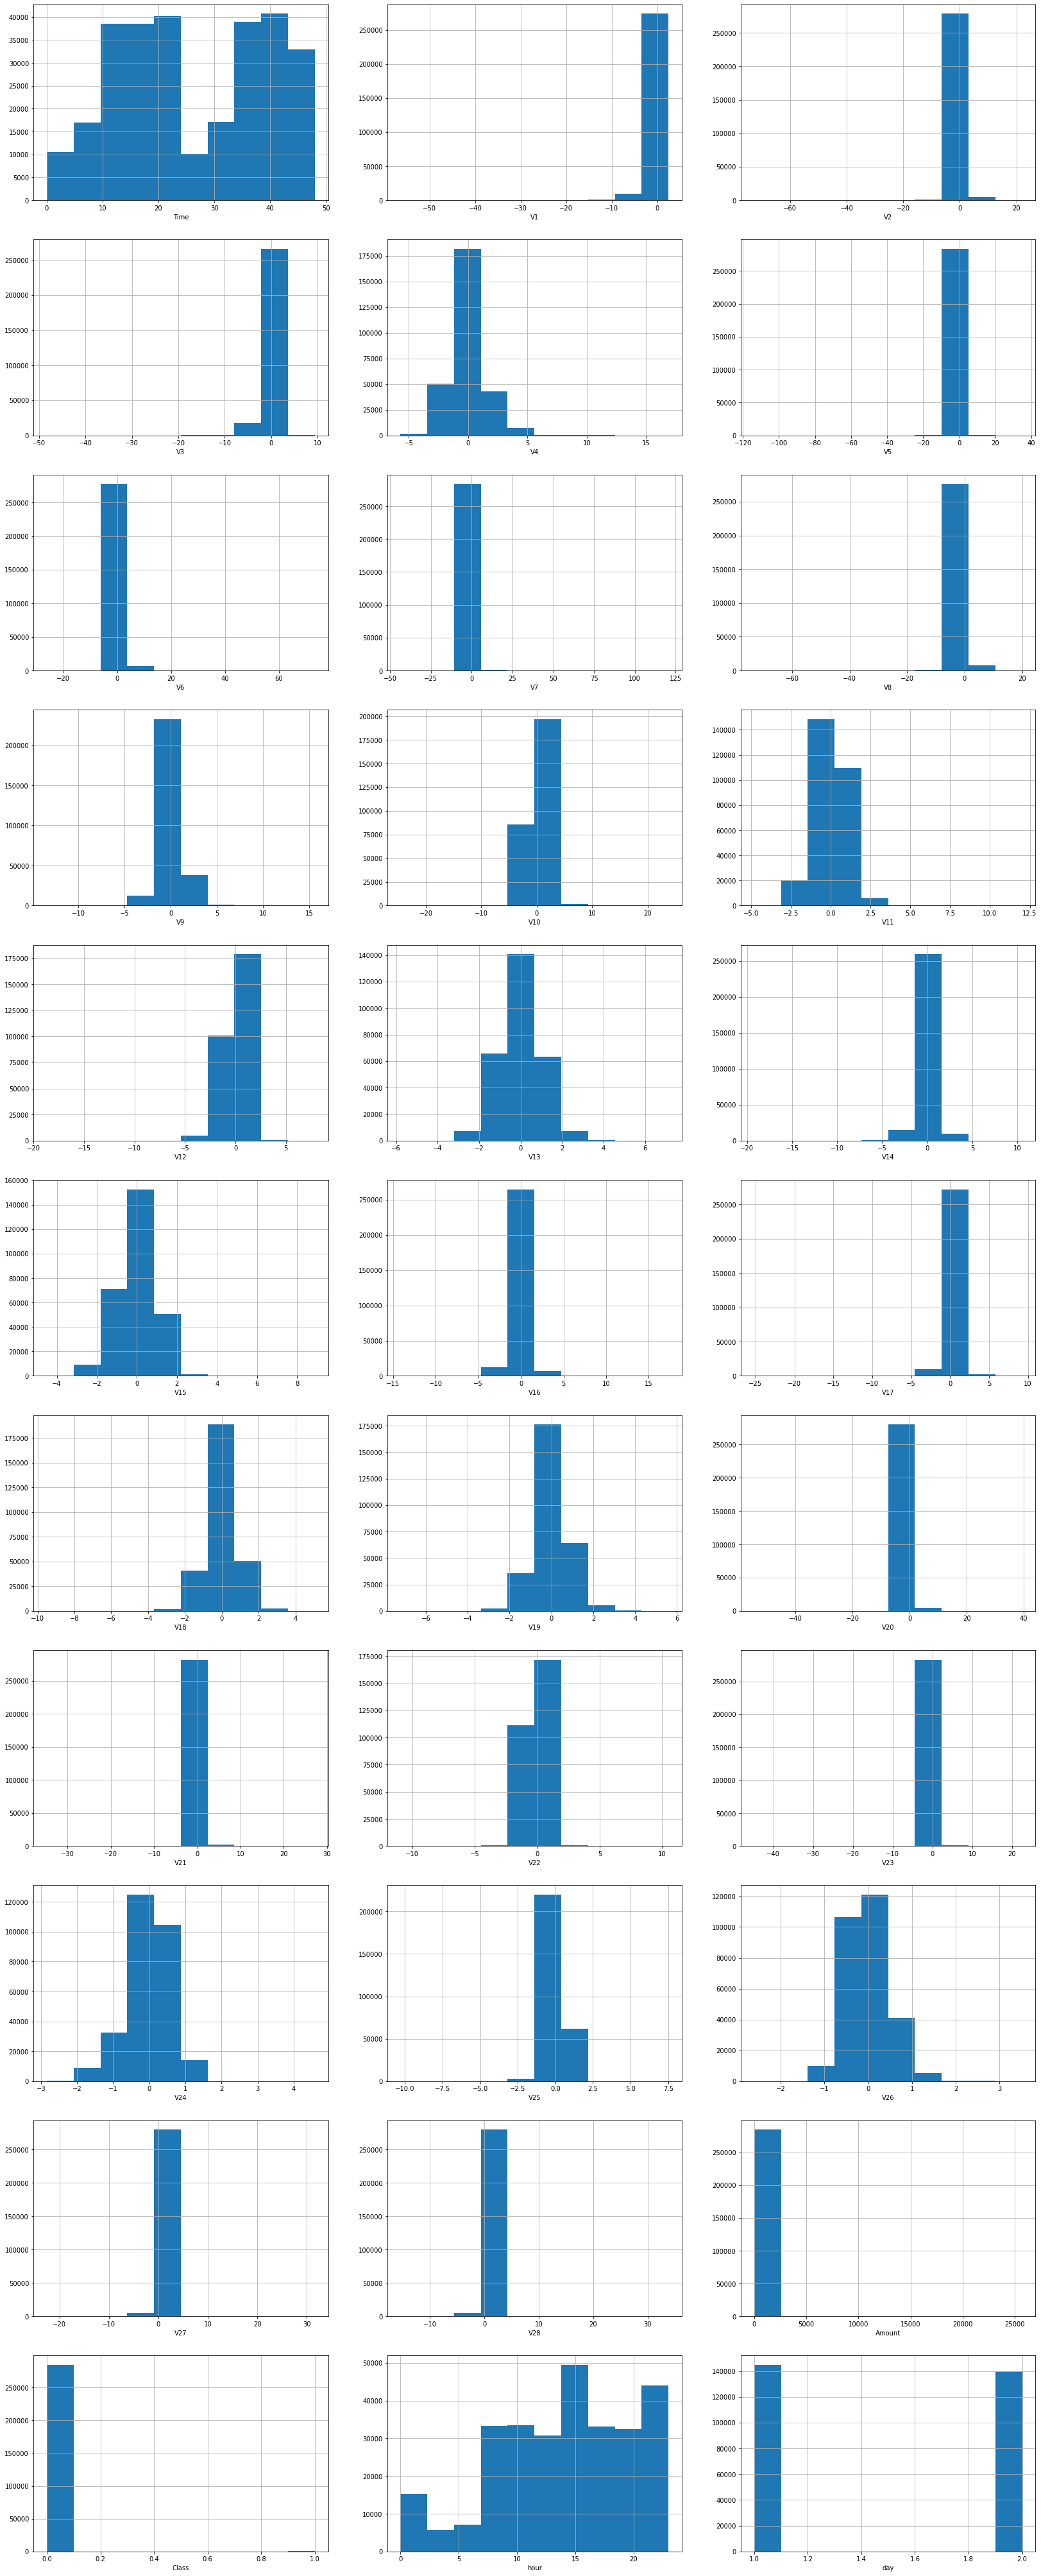

In [19]:
#  histogram  to view distribution of data
plt.figure(figsize=(28,100))
plotnumber=1
for i in df.columns:
    ax=plt.subplot(15,3,plotnumber)  # subplots to cover 3 plots at each row
    df[i].hist() 
    
    plt.xlabel(i ) # label name of feature
 
    plotnumber+=1 # at which place to place plot of each feature
plt.show() 
 

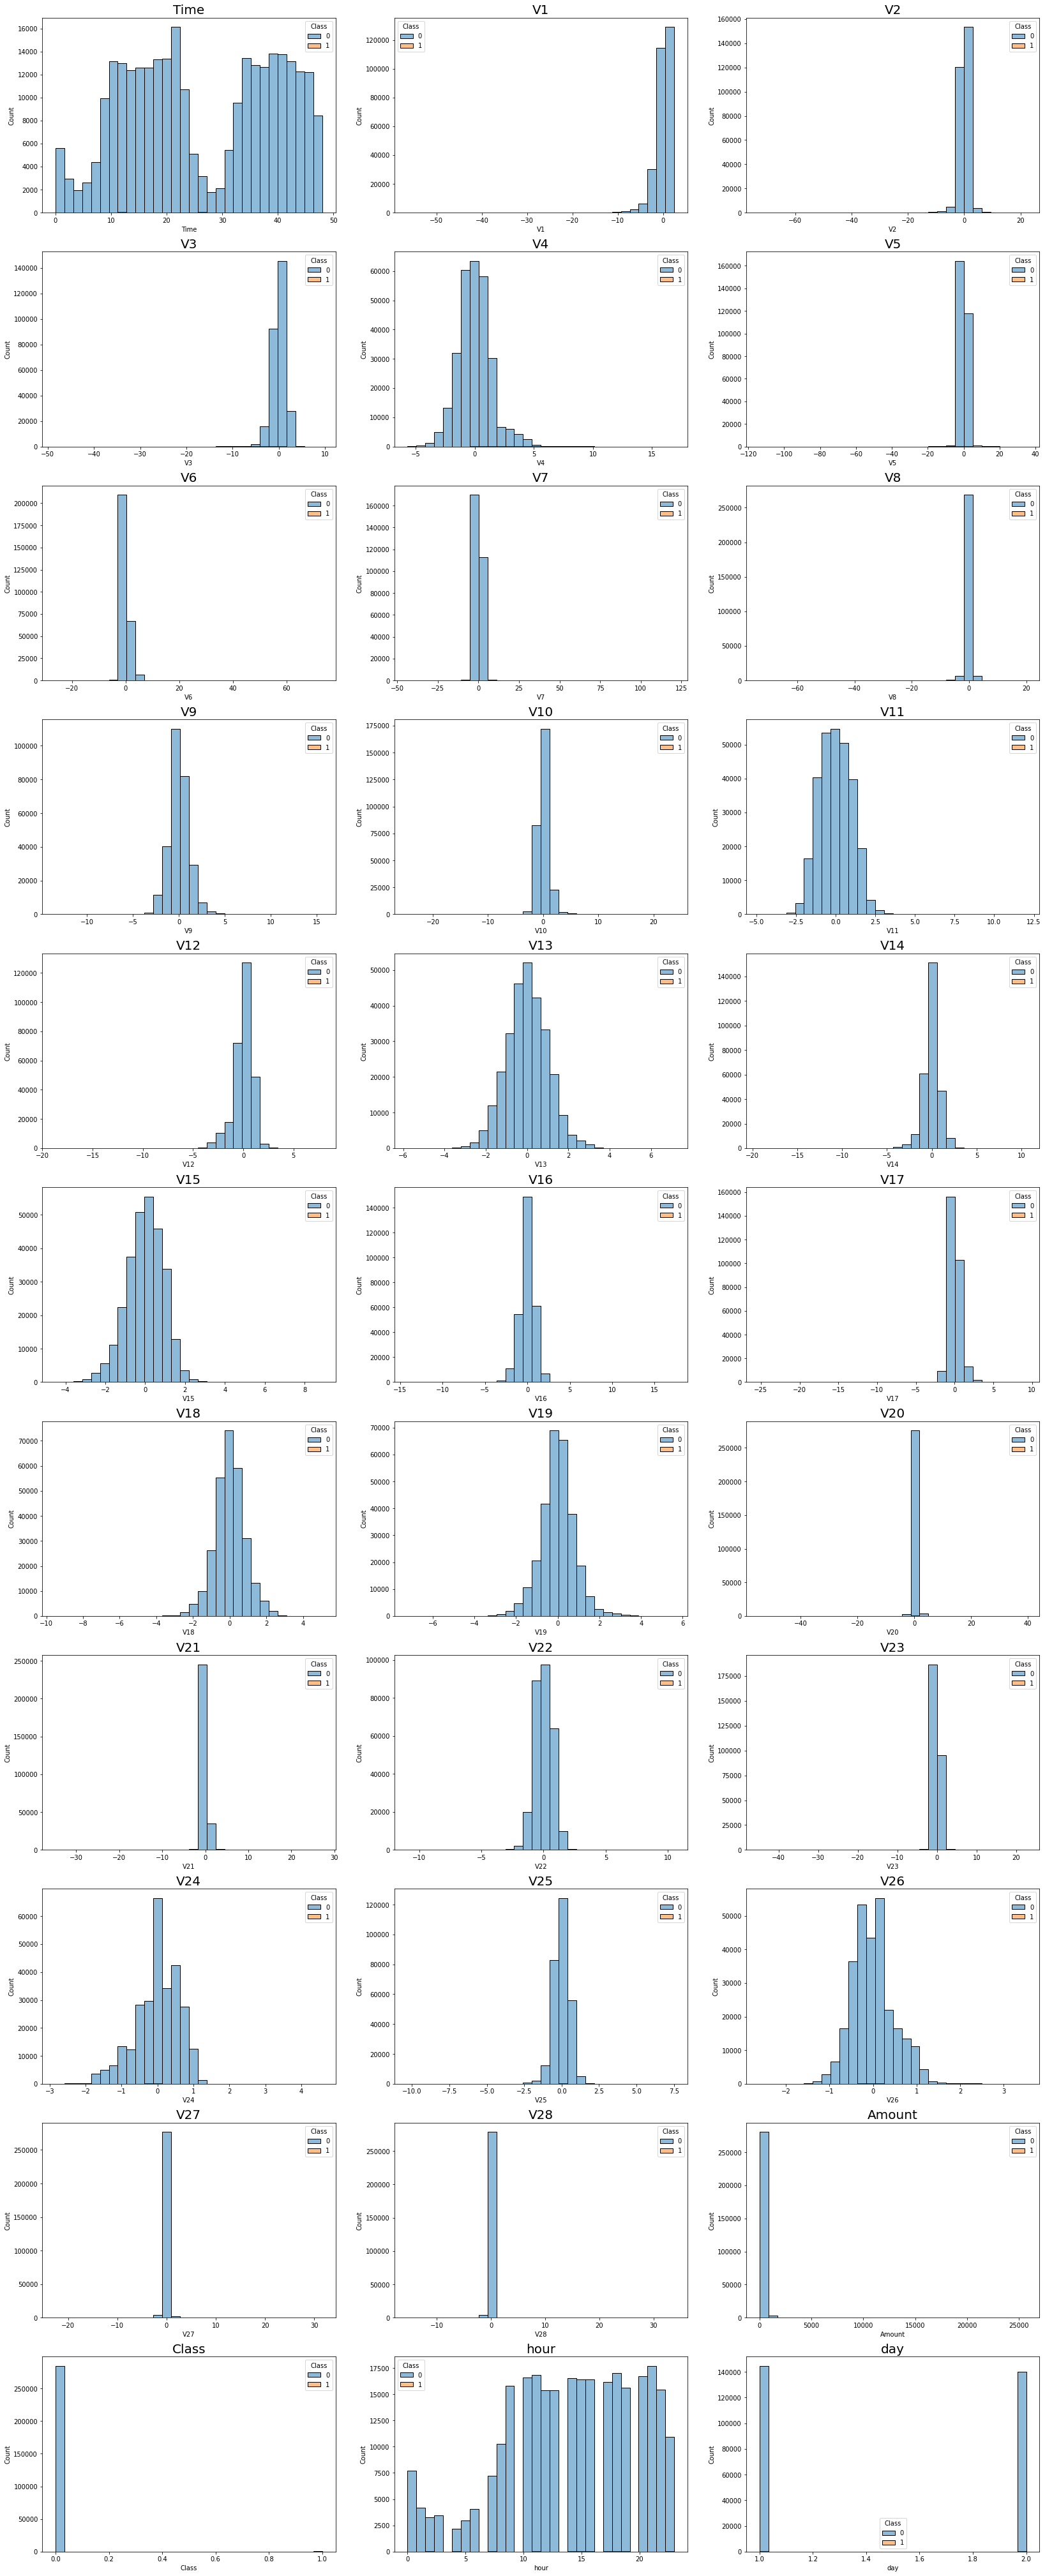

In [20]:
#  histogram  to plot wrt 0s and 1s
plt.figure(figsize=(28,100))
plotnumber=1
for i in df.columns:
    ax=plt.subplot(15,3,plotnumber) # subplots to cover 3 plots at each row
    sns.histplot( data=df,x= i ,bins=30,hue=df['Class']) 
    
    plt.title(i,size=20)
    plotnumber+=1
plt.show() 
 

## Distplot


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

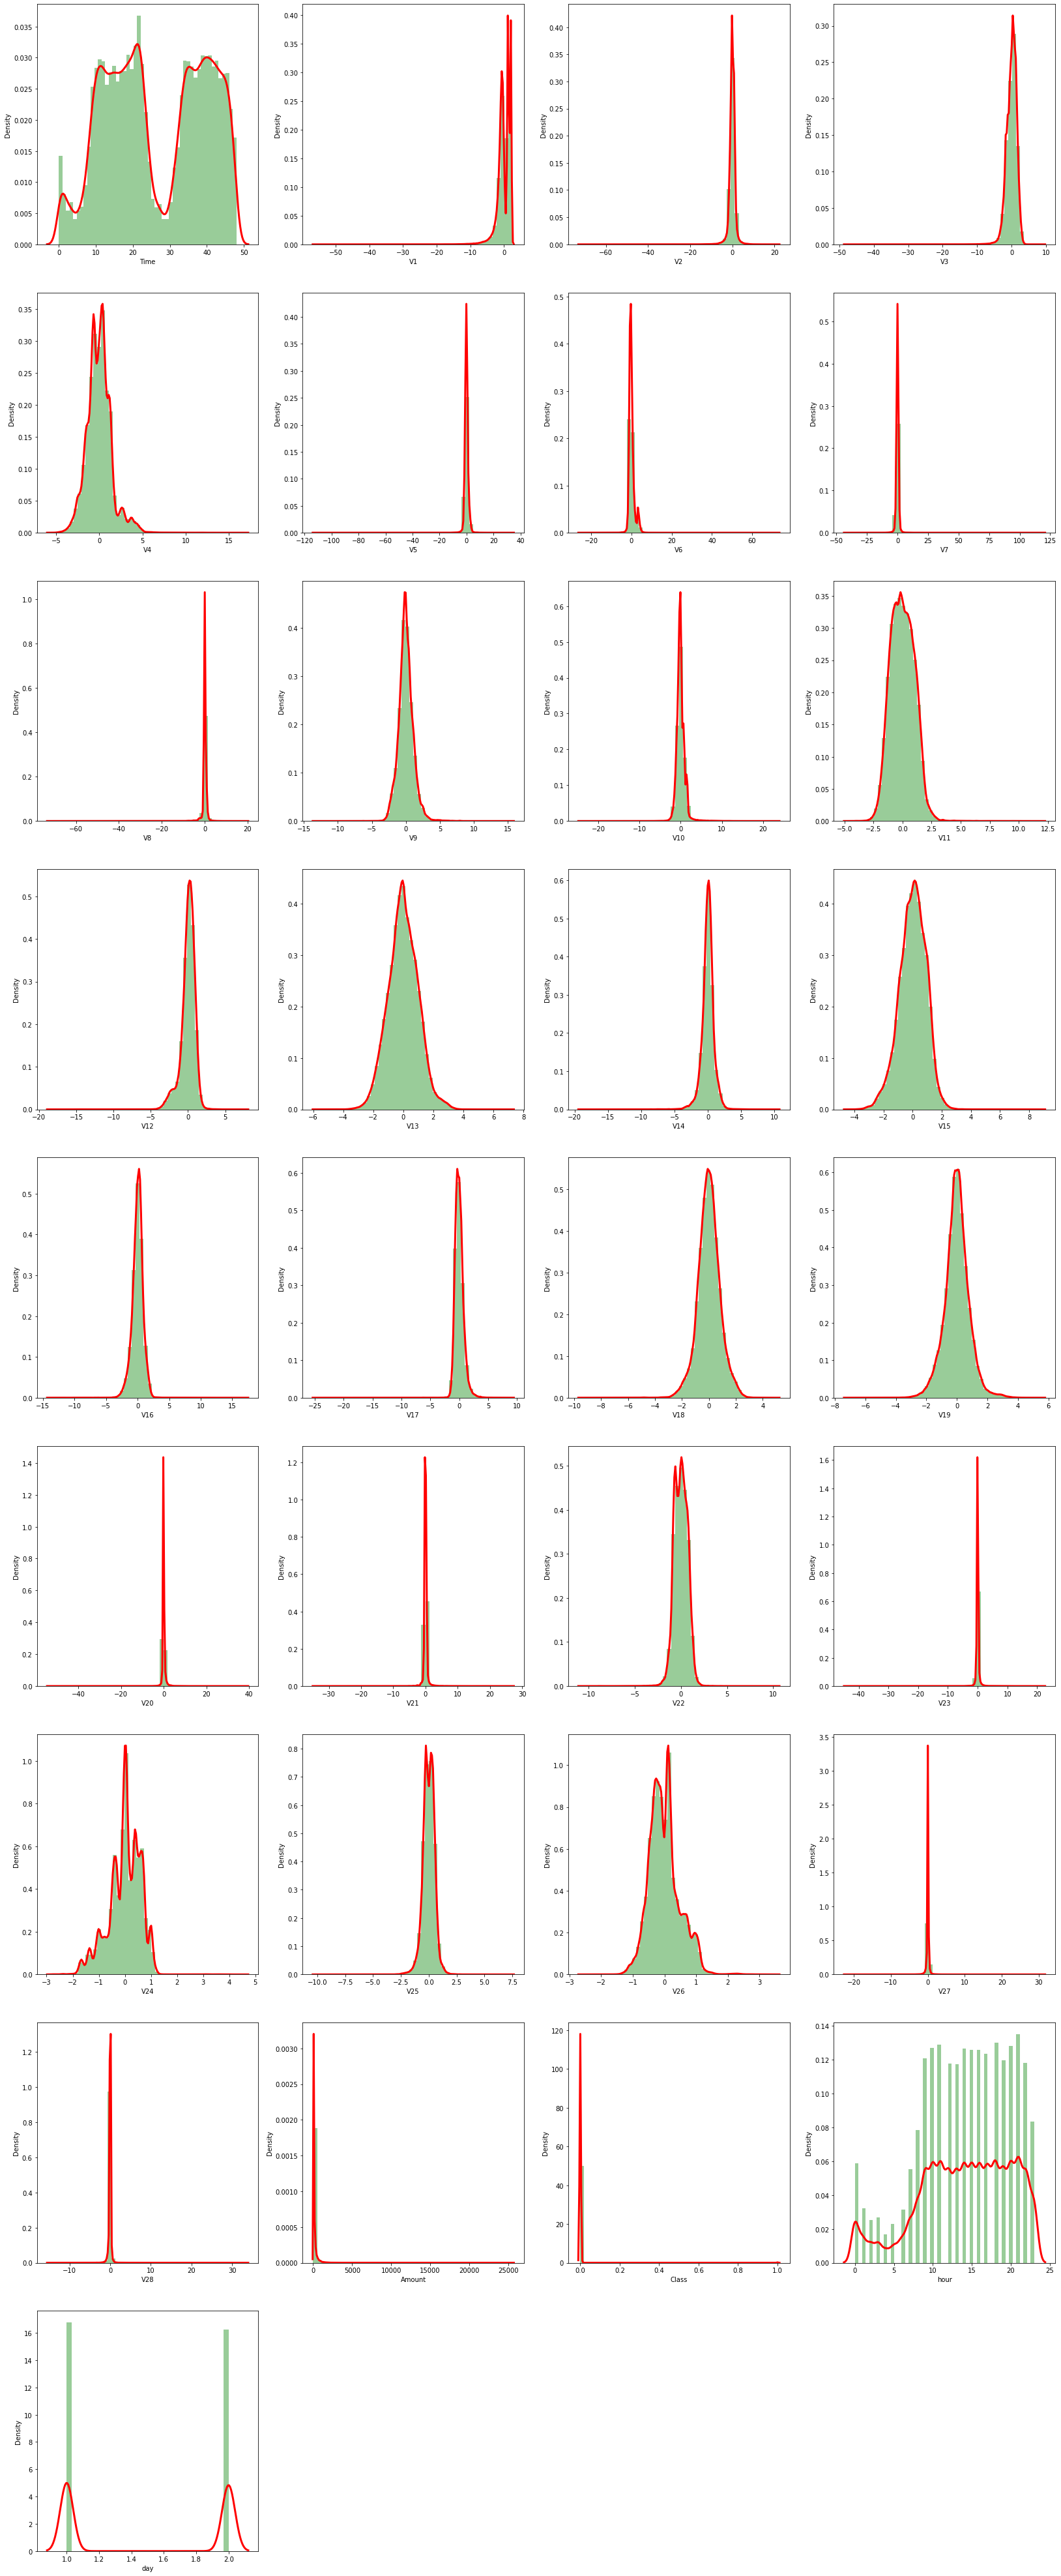

In [21]:
#  distplot  to plot  
plt.figure(figsize=(28,80))
plotnumber=1
for i in df.columns:
    ax=plt.subplot(10,4,plotnumber)   # subplots to cover 4 plots at each row
    sns.distplot(x=df[i], color = 'g',    kde_kws={"color": "r", "lw": 3, "label": "KDE"})
#     plt.title(i)
    plt.xlabel(i ) # label name of feature
 
    plotnumber+=1 # at which place to place plot of each feature
plt.show()

## 

## Box plot

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

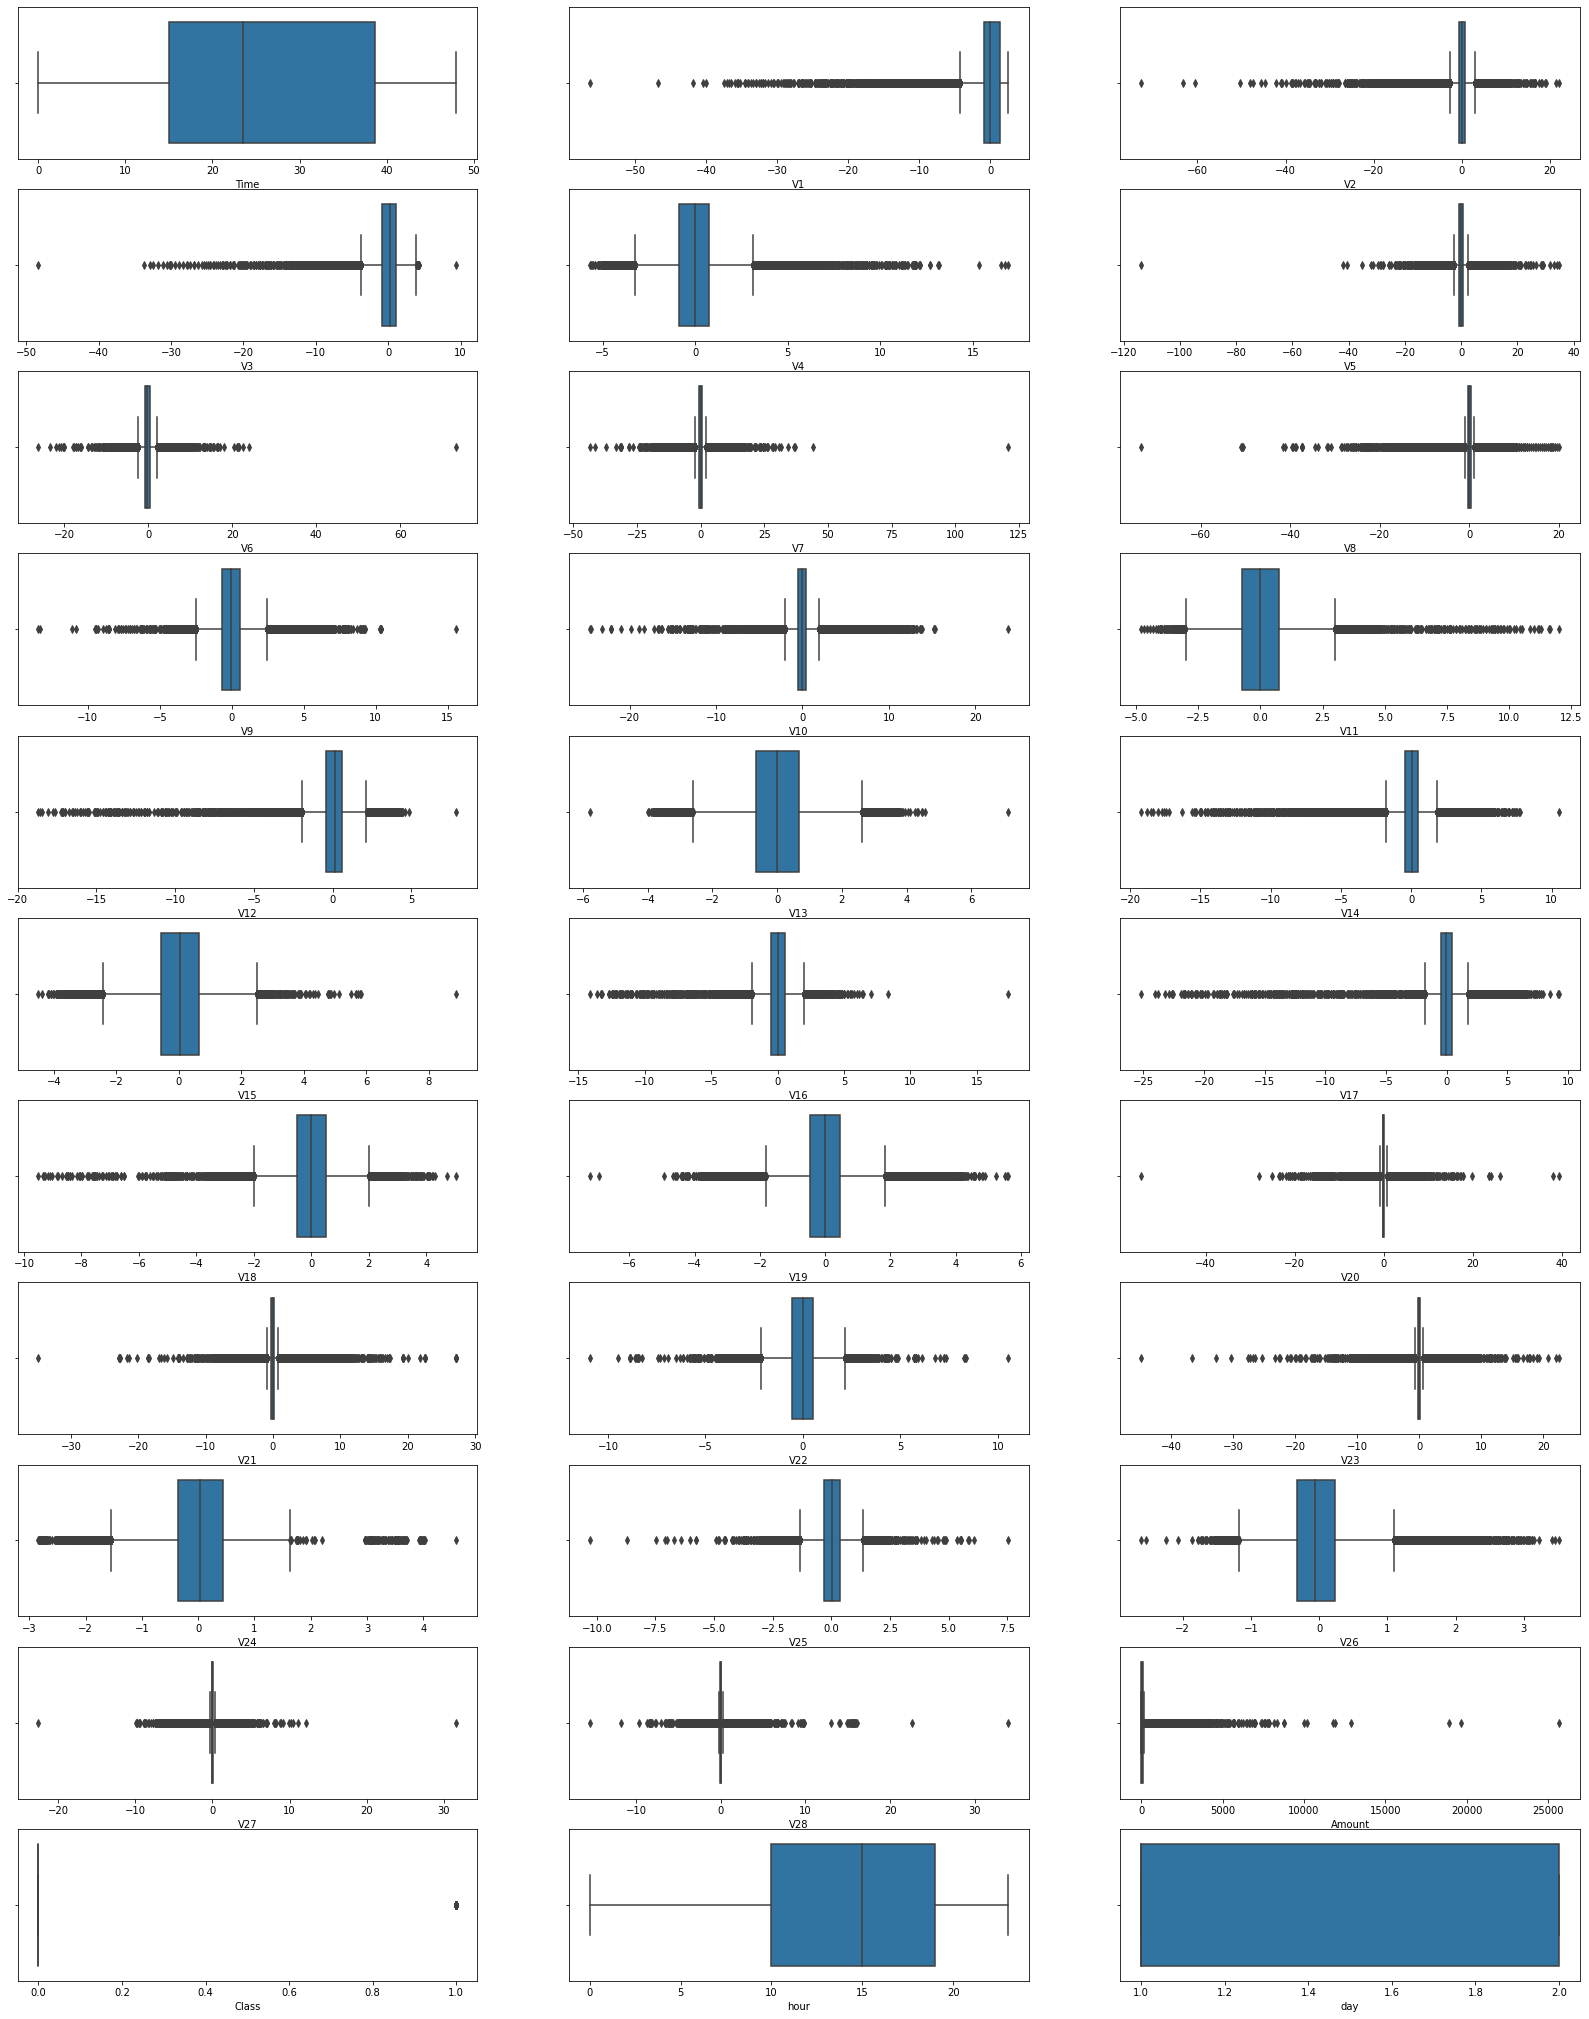

In [22]:
# plot boxplot to view outliers
plt.figure(figsize=(28,100))
plotnumber=1
for i in df.columns:
    ax=plt.subplot(30,3,plotnumber) # subplots to cover 3 plots at each row
    sns.boxplot(df[i])
 
    plt.xlabel(i ) # label name of feature
 
    plotnumber+=1 # at which place to place plot of each feature
plt.show() 

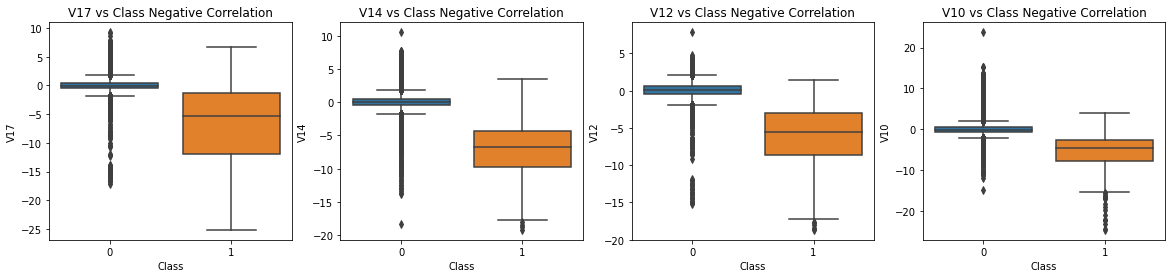

In [23]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

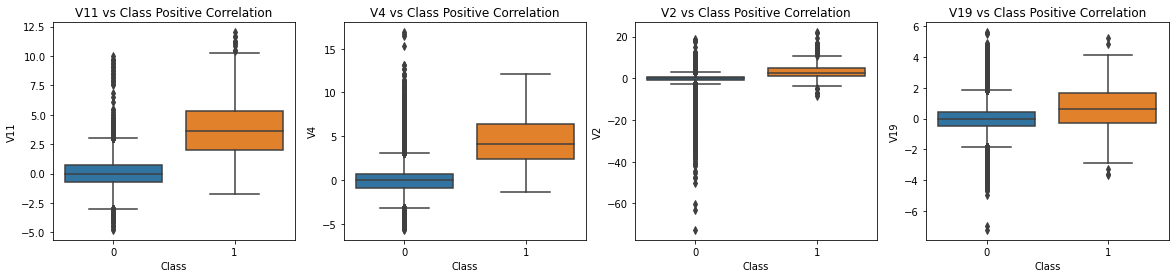

In [24]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V2", data=df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

## Type of transactions

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


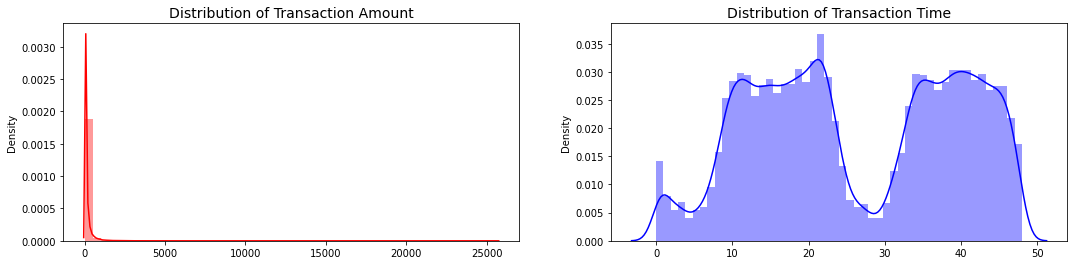

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r') # dist plot of Amount 
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
# ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14) # dist plot of time 
# ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


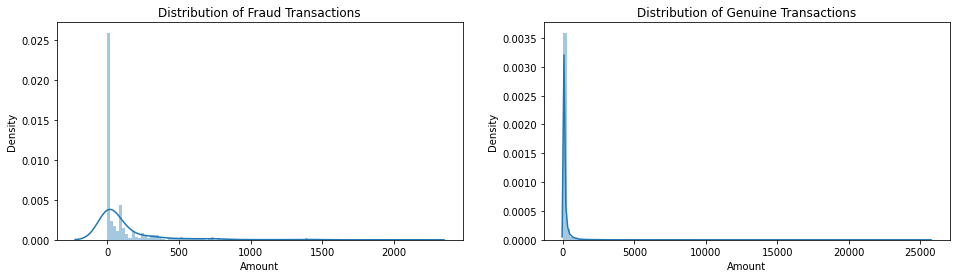

In [26]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[df['Class'] == 1]['Amount'], bins=100, ax=axs[0]) # plot fraud trasaction select of class 1 and plot its amount
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[df['Class'] == 0]['Amount'], bins=100, ax=axs[1]) # plot fraud trasaction select of class 0 and plot its amount
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

In [27]:
print("Fraud Transaction distribution : \n",df[(df['Class'] == 1)]['Amount'].value_counts().head(10)) 
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].max()) # max fraud amount
print("Minimum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].min()) # min fraud amount

Fraud Transaction distribution : 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
0.01       5
2.00       4
3.79       4
2.28       3
12.31      3
Name: Amount, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


In [28]:
print("Genuine Transaction distribution : \n",df[(df['Class'] == 0)]['Amount'].value_counts().head(10))
print("\n")
print("Maximum amount of Genuine transaction - ",df[(df['Class'] == 0)]['Amount'].max()) # max Gunuine  amount
print("Minimum amount of Genuine transaction - ",df[(df['Class'] == 0)]['Amount'].min()) # min Gunuine  amount

Genuine Transaction distribution : 
 1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
0.76      2981
10.00     2950
1.29      2892
1.79      2622
0.99      2304
Name: Amount, dtype: int64


Maximum amount of Genuine transaction -  25691.16
Minimum amount of Genuine transaction -  0.0


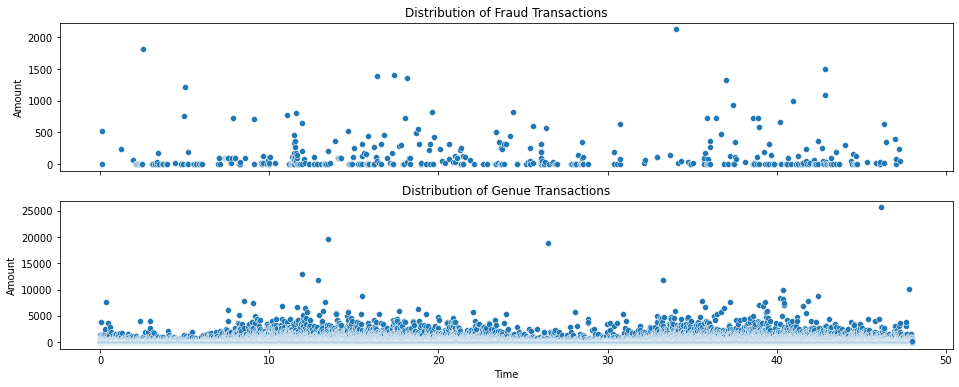

In [29]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==1], ax=axs[0]) # scatter plot of time and amount of class 1 ie fraud values
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==0], ax=axs[1]) # scatter plot of time and amount of class 0 ie Gunuine values
axs[1].set_title("Distribution of Genue Transactions")

plt.show()

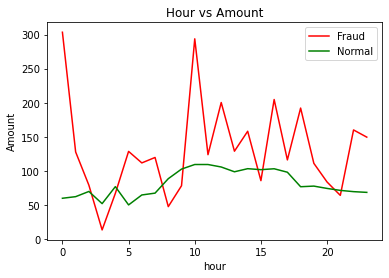

In [30]:
n=df[df['Class'] == 1] 
p=df[df['Class'] == 0]
f, ax = plt.subplots(1, 1)
ax=sns.lineplot(data=n,x="hour",y="Amount" ,color='red' ,label="Fraud",ci=None)
sns.lineplot(data=p,x="hour",y="Amount" ,color='green',  label="Normal",ax=ax,ci=None)
# plt.legend(["Fraud","Normal"])
plt.title("Hour vs Amount")
plt.show()


## Correlation

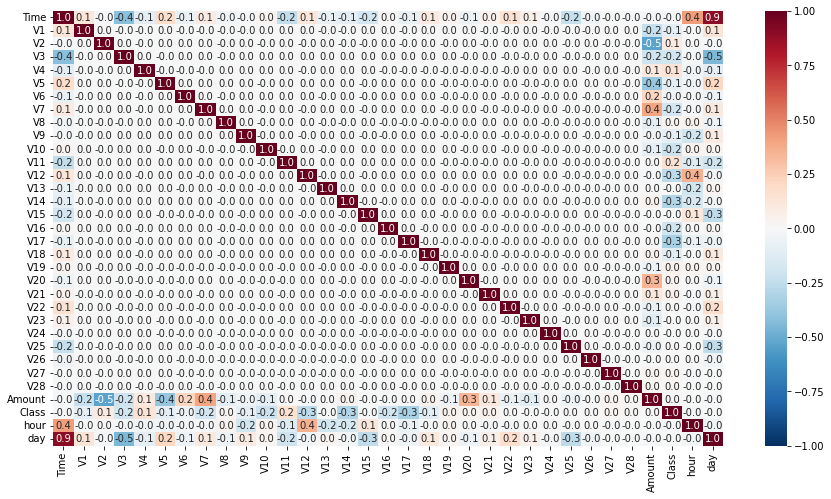

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmax=1, vmin=-1,fmt='.1f')
plt.show()

In [32]:
df[['Time','Amount','Class']].corr()['Class'].sort_values(ascending=False)  # correlation  value of time , amount and class

Class     1.000000
Amount    0.005632
Time     -0.012323
Name: Class, dtype: float64

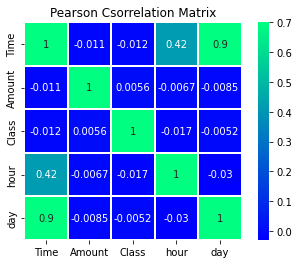

In [33]:
plt.title('Pearson Csorrelation Matrix')
# correlation of time, amount,class ,hour and day
sns.heatmap(df[['Time','Amount','Class',"hour","day"]].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="winter",  linecolor='w',annot=True);


In [34]:
#Correlation with output variable
correlation=df.corr()
cor_target = abs(correlation["Class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target < 1]
relevant_features.sort_values(ascending=False)  

V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
hour      0.017109
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
day       0.005223
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

In [35]:

relevant_features=relevant_features.sort_values(ascending=False).head(20)
columns= relevant_features.index  
z=df[columns]
y=df[['Class']] 

In [36]:
relevant_features

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
V7     0.187257
V11    0.154876
V4     0.133447
V18    0.111485
V1     0.101347
V9     0.097733
V5     0.094974
V2     0.091289
V6     0.043643
V21    0.040413
V19    0.034783
V20    0.020090
V8     0.019875
V27    0.017580
Name: Class, dtype: float64

# Create ML model

In [37]:
xtr,xte,ytr,yte=train_test_split(z,y ,train_size=0.7) 

In [38]:
smt=SMOTE() 

In [39]:
xtr,ytr=smt.fit_resample(xtr,ytr) # balance imbalance dataset

## Logistic  Regression

In [40]:
lr=LogisticRegression() 
lr.fit(xtr,ytr)
ypred=lr.predict(xte)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print(classification_report(ypred,yte))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     83116
           1       0.93      0.06      0.11      2327

    accuracy                           0.97     85443
   macro avg       0.95      0.53      0.55     85443
weighted avg       0.97      0.97      0.96     85443



<AxesSubplot:>

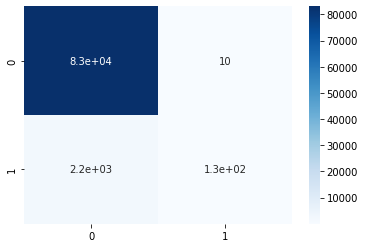

In [42]:
cf_matrix = confusion_matrix(ypred, yte)
sns.heatmap(cf_matrix, annot=True,   cmap='Blues')

## KNN neighbour

In [43]:
knn=KNeighborsClassifier() 
knn.fit(xtr,ytr)
ypred=knn.predict(xte)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<AxesSubplot:>

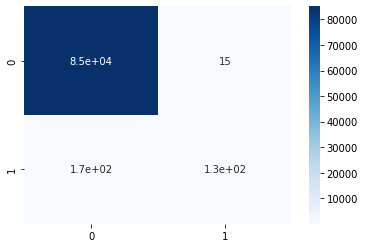

In [44]:
cf_matrix = confusion_matrix(ypred, yte)
sns.heatmap(cf_matrix, annot=True,   cmap='Blues')

In [45]:
print(classification_report(ypred,yte))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85144
           1       0.89      0.42      0.58       299

    accuracy                           1.00     85443
   macro avg       0.95      0.71      0.79     85443
weighted avg       1.00      1.00      1.00     85443



## SVC 

In [46]:
sv=SVC()
sv.fit(xtr,ytr)
ypred=sv.predict(xte)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

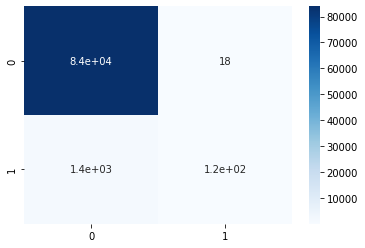

In [47]:
cf_matrix = confusion_matrix(ypred, yte)
sns.heatmap(cf_matrix, annot=True,   cmap='Blues')

In [48]:
print(classification_report(ypred,yte))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83946
           1       0.87      0.08      0.15      1497

    accuracy                           0.98     85443
   macro avg       0.93      0.54      0.57     85443
weighted avg       0.98      0.98      0.98     85443



# Decicision Tree

In [49]:
DTC=DecisionTreeClassifier()

In [50]:
DTC.fit(xtr,ytr)

DecisionTreeClassifier()

In [51]:
ypred=DTC.predict(xte)

In [52]:
confusion_matrix(ypred,yte)

array([[85074,    20],
       [  227,   122]])

In [53]:
print(classification_report(ypred,yte))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85094
           1       0.86      0.35      0.50       349

    accuracy                           1.00     85443
   macro avg       0.93      0.67      0.75     85443
weighted avg       1.00      1.00      1.00     85443



## Random Forest

In [54]:
rf=RandomForestClassifier()

In [55]:
rf.fit(xtr,ytr)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [56]:
ypred=rf.predict(xte)

In [57]:
print(classification_report(ypred,yte))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.90      0.88       136

    accuracy                           1.00     85443
   macro avg       0.93      0.95      0.94     85443
weighted avg       1.00      1.00      1.00     85443



<AxesSubplot:>

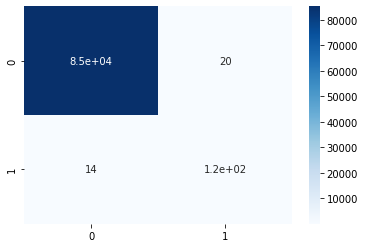

In [58]:
cf_matrix = confusion_matrix(ypred, yte)
sns.heatmap(cf_matrix, annot=True,   cmap='Blues')

# AdaBoost

In [59]:
ad=AdaBoostClassifier()
ad.fit(xtr,ytr)
ypred=ad.predict(xte)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
print(classification_report(ypred,yte))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     83118
           1       0.93      0.06      0.11      2325

    accuracy                           0.97     85443
   macro avg       0.95      0.53      0.55     85443
weighted avg       0.97      0.97      0.96     85443



<AxesSubplot:>

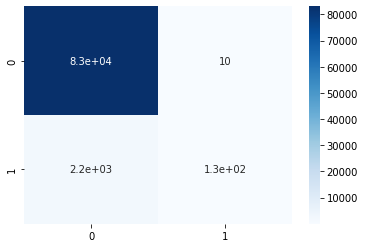

In [61]:
cf_matrix = confusion_matrix(ypred, yte)
sns.heatmap(cf_matrix, annot=True,   cmap='Blues')

## AS RF performce better among others , so we optimize it  

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [64]:
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,  n_iter = 10, cv = 4, verbose=2, random_state=35, n_jobs = -1)

In [65]:
rf_random.fit(xtr, ytr)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 6.7min
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 6.6min
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time= 6.8min
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time= 7.1min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time= 1.4min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time= 1.4min
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=  21.6s
[CV] END bootstrap=False, max_depth=20, ma

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 6.6min
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 6.8min
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time= 6.8min
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time= 7.0min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time= 1.5min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time= 1.5min
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=  20.5s
[CV] END bootstrap=False, max_depth=20, ma

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [66]:
ypred1 =rf_random.predict(xte)

In [67]:
print(classification_report(ypred1,yte))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85311
           1       0.85      0.91      0.88       132

    accuracy                           1.00     85443
   macro avg       0.92      0.95      0.94     85443
weighted avg       1.00      1.00      1.00     85443



<AxesSubplot:>

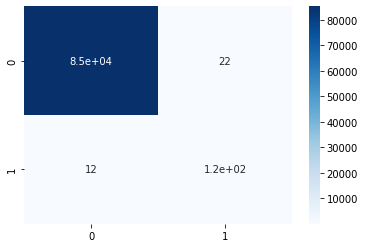

In [68]:
cf_matrix = confusion_matrix(ypred1, yte)
sns.heatmap(cf_matrix, annot=True,   cmap='Blues')